In [3]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

import numpy as np
import random
import torch
import torch.nn as nn
import torchvision.utils as vutils
import torchvision.datasets as dset
import torchvision.transforms as transforms
import matplotlib.pylab as plt

import glob
from glob import glob
import nibabel as nb

In [4]:
if torch.cuda.is_available():
    print("The code will run on GPU.")
else:
    print("The code will run on CPU. Go to Edit->Notebook Settings and choose GPU as the hardware accelerator")
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
torch.cuda.manual_seed_all(42)

The code will run on GPU.


In [10]:
def save_models(G_A2B, G_B2A, D_A, D_B, name):

  torch.save(G_A2B, name+"_G_A2B.pt")
  torch.save(G_B2A,  name+"_G_B2A.pt")
  torch.save(D_A,  name+"_D_A.pt")
  torch.save(D_B, name+"_D_B.pt")

def load_models( name):
  G_A2B=torch.load(name+'_G_A2B.pt', map_location=torch.device('cpu'))
  G_B2A=torch.load(name+"_G_B2A.pt",map_location=torch.device('cpu'))
  D_A=torch.load(name+"_D_A.pt", map_location=torch.device('cpu'))
  D_B=torch.load(name+"_D_B.pt", map_location=torch.device('cpu'))
  return G_A2B, G_B2A, D_A, D_B

In [11]:
from ResnetGenerator import ResnetGenerator
from NLayerDiscriminator import NLayerDiscriminator

def LSGAN_D(real, fake):
  return (torch.mean((real - 1)**2) + torch.mean(fake**2))

def LSGAN_G(fake):
  return  torch.mean((fake - 1)**2)

criterion_Im = torch.nn.L1Loss()

In [41]:
from skimage.transform import resize


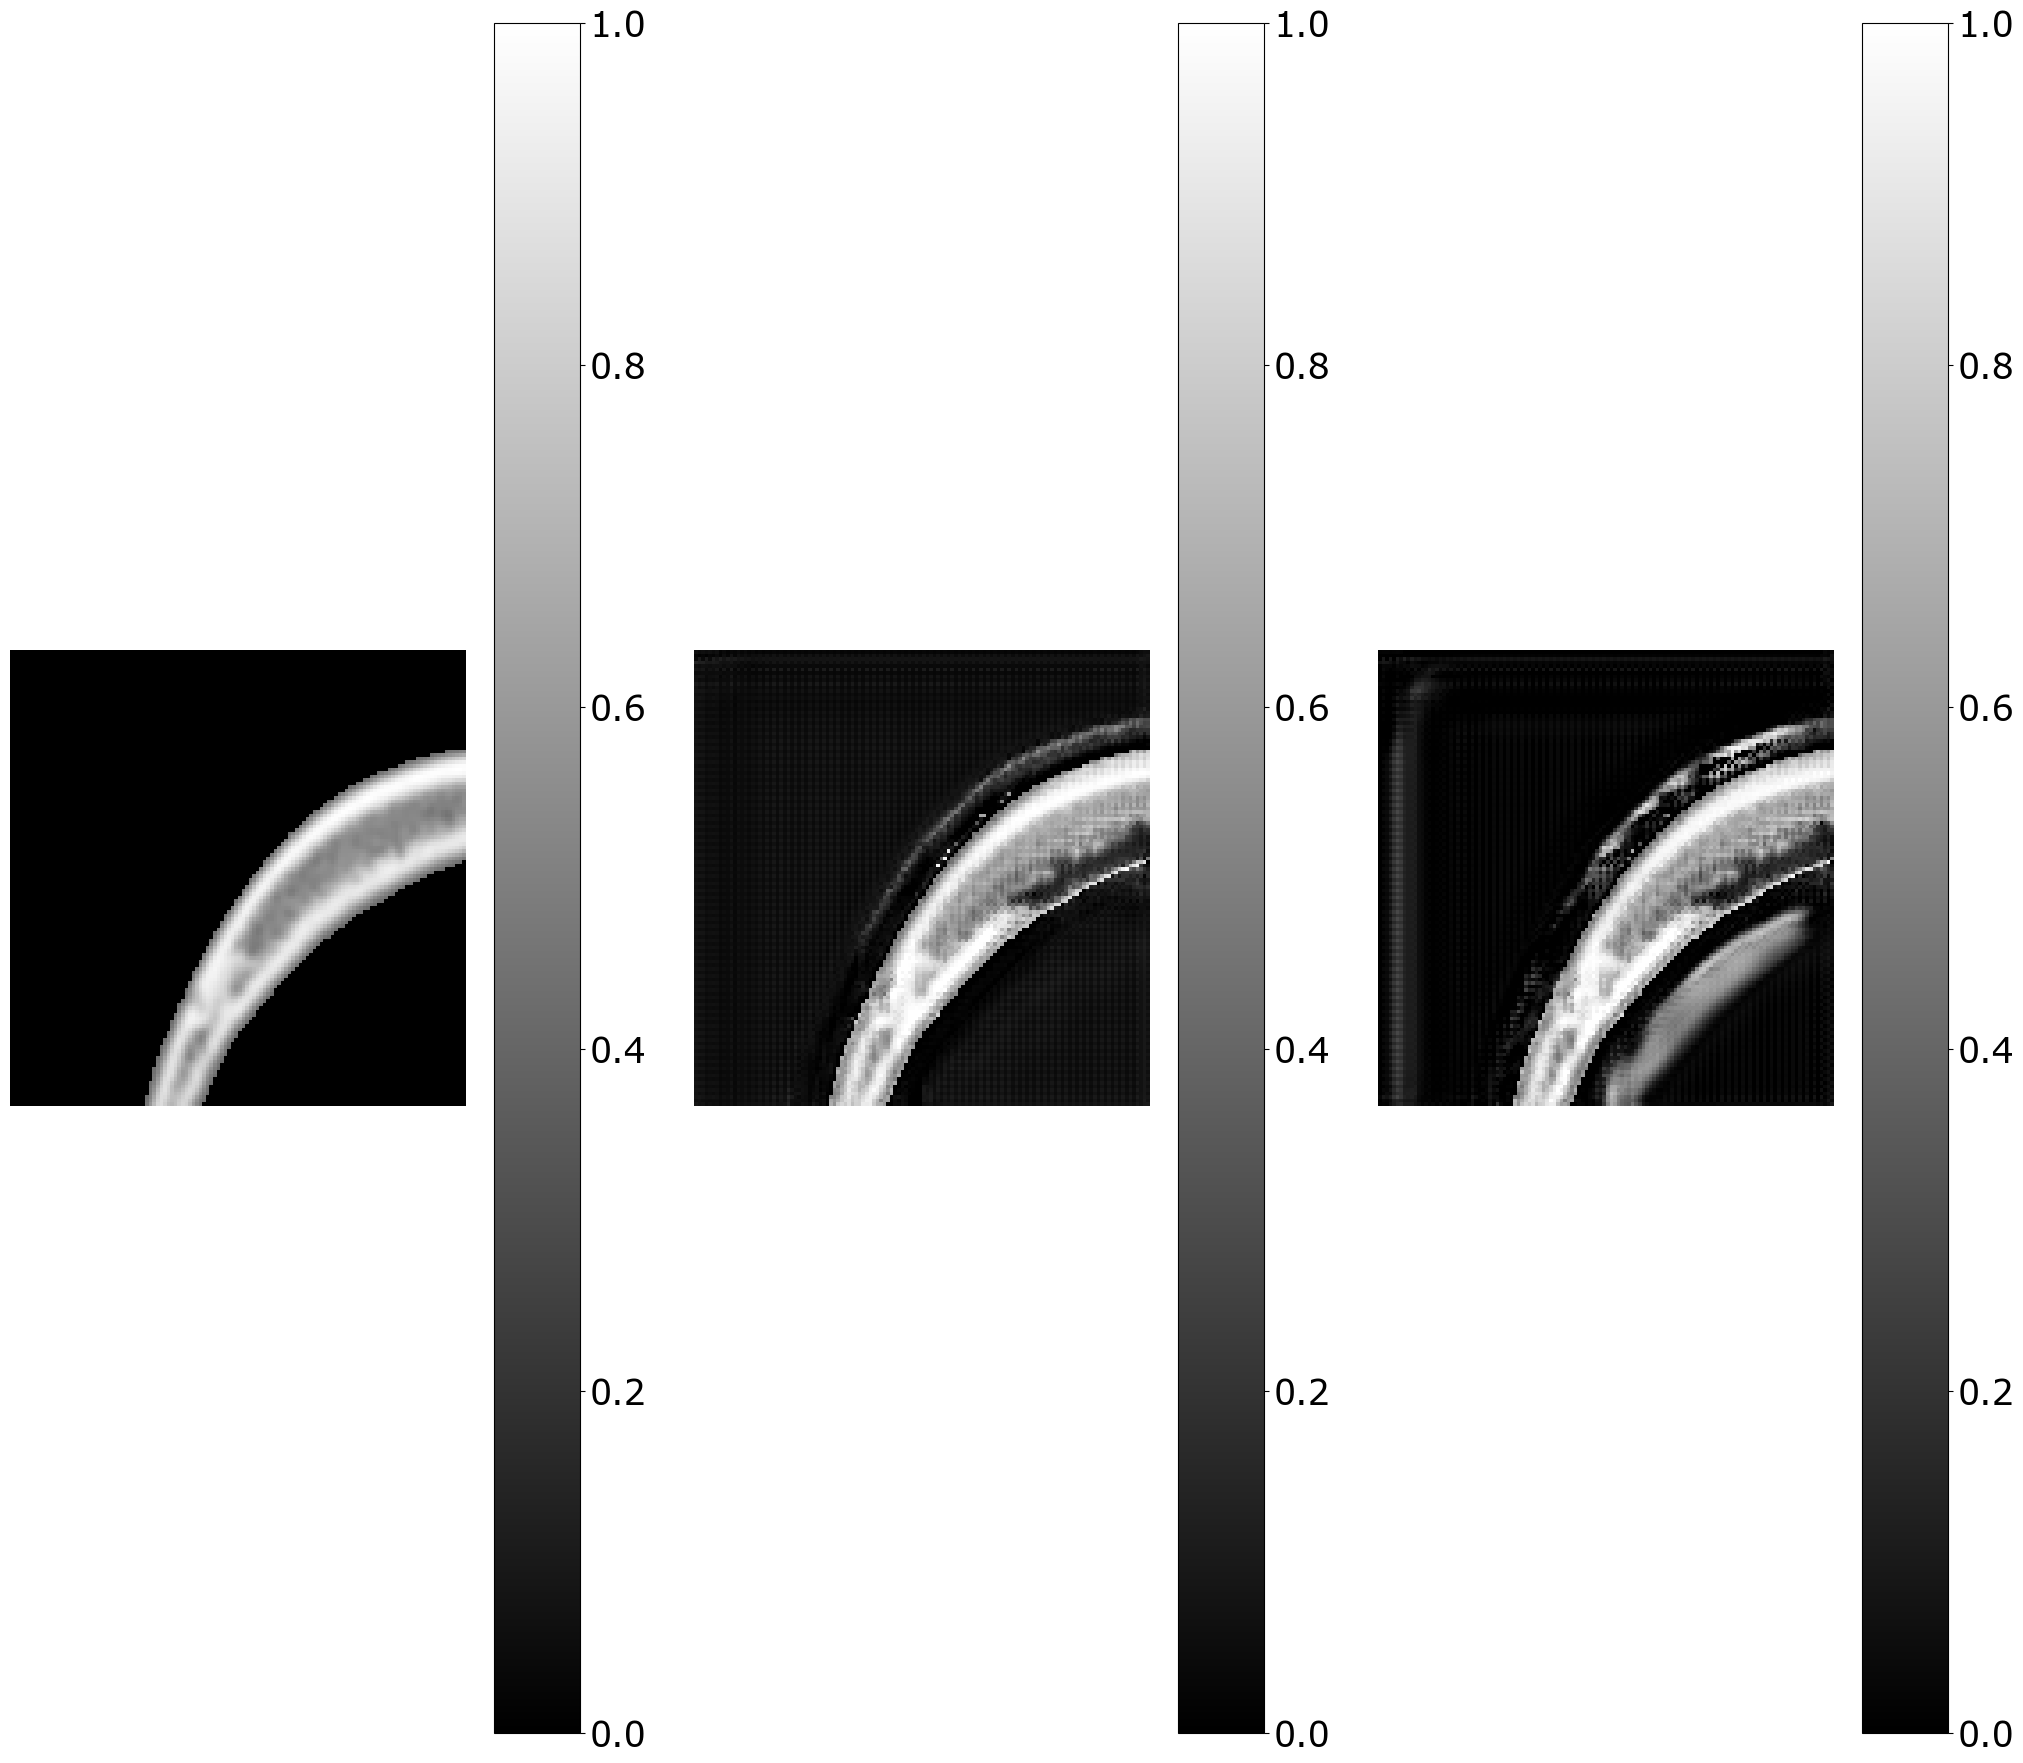

In [66]:

plt.subplots(1,3, figsize=(25,25))
 #Change data root to match dataset path: 
real_ct= 
#real_ct = resize(real_ct, (64, 64))

real_ct = (real_ct - np.min(real_ct)) / (np.max(real_ct) - np.min(real_ct))
G_A2B, G_B2A, D_A, D_B = load_models("45skull_bs4_dl4_lr210-4_b09")
G_A2B.to(device)
G_B2A.to(device)
D_A.to(device)
D_B.to(device)
real_ct = torch.Tensor(real_ct).unsqueeze(0).unsqueeze(0) ## test_mris[choose image]
fake_mri = G_B2A(real_ct.to(device)).cpu().detach().numpy()
rec_ct = G_A2B(torch.Tensor(fake_mri).to(device)).cpu().detach().numpy()
plt.subplot(1,3,1)
plt.imshow(real_ct[0,0,:,:],cmap='gray');plt.axis('off')
plt.colorbar().ax.tick_params(labelsize=25)
plt.clim(0, 1);
plt.subplot(1,3,2)
plt.imshow(fake_mri[0,0,:,:],cmap='gray');plt.axis('off')
plt.colorbar().ax.tick_params(labelsize=25)
plt.clim(0, 1);
plt.subplot(1,3,3)
plt.imshow(rec_ct[0,0,:,:],cmap='gray');plt.axis('off')
plt.colorbar().ax.tick_params(labelsize=25)
plt.clim(0, 1);

<AxesSubplot: label='<colorbar>'>

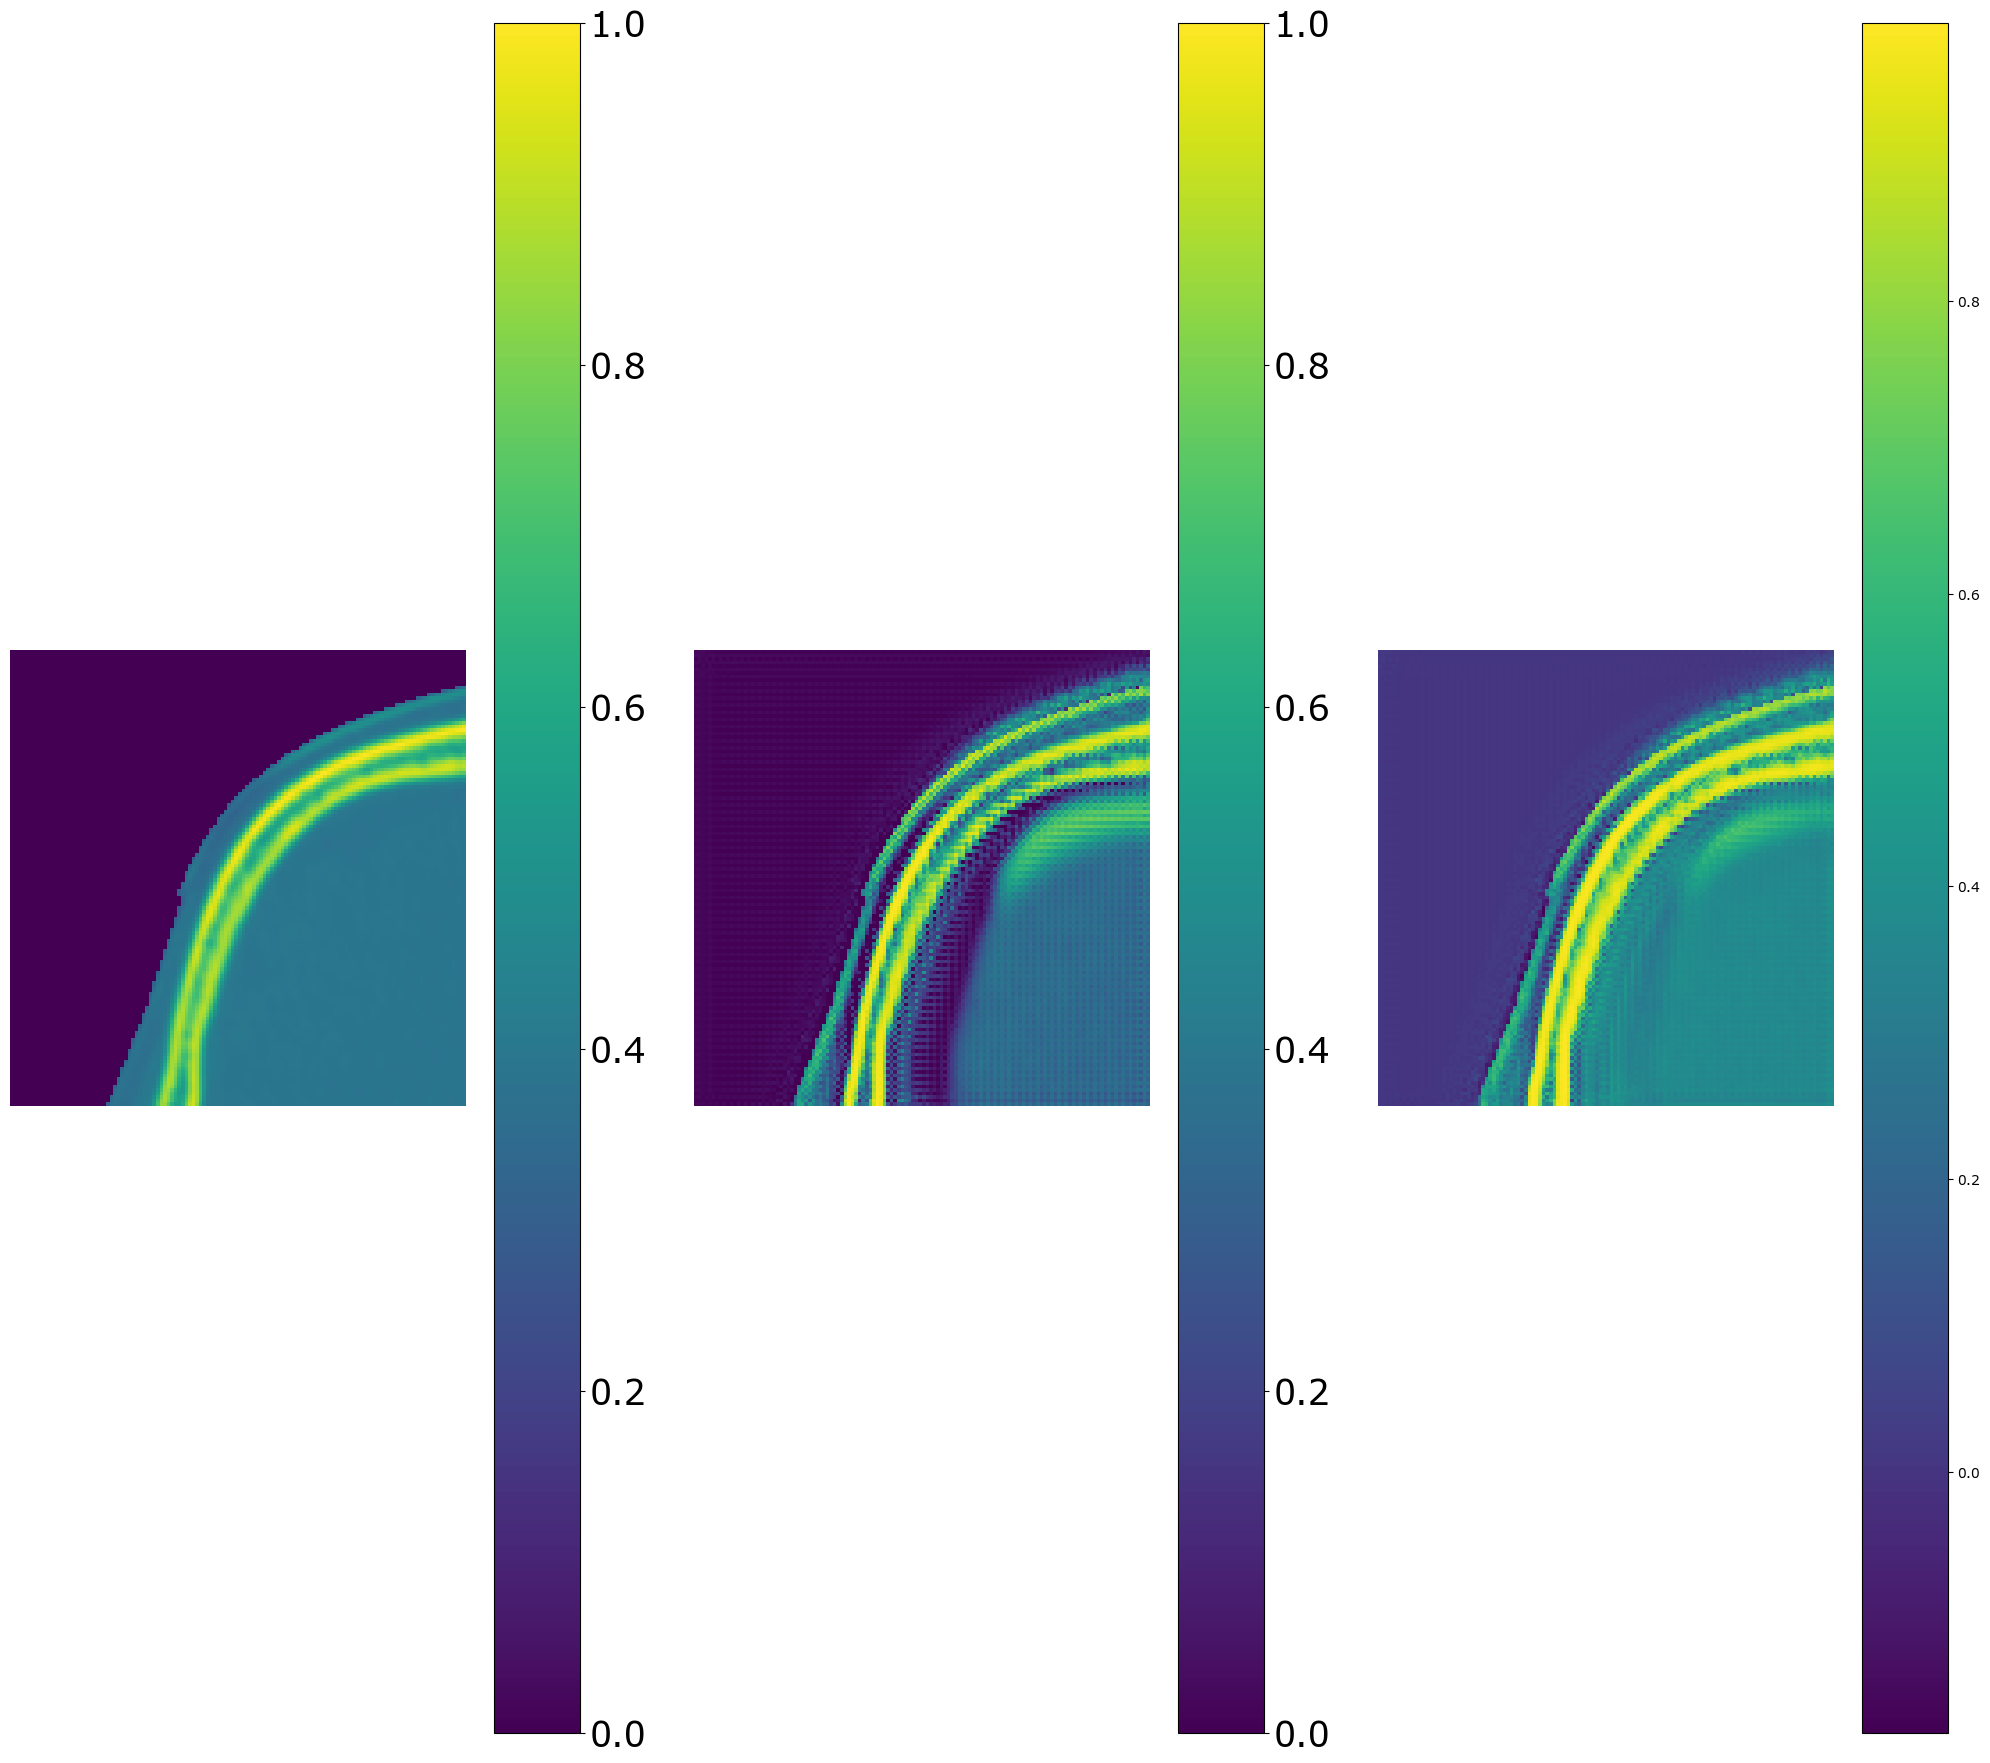

In [63]:

plt.subplots(1,3, figsize=(25,25))
    #Change data root to match dataset path: 
real_ct=
#real_ct = resize(real_ct, (64, 64))

real_ct = (real_ct - np.min(real_ct)) / (np.max(real_ct) - np.min(real_ct))
G_A2B, G_B2A, D_A, D_B = load_models("5bs2_dl1_res5_lr2105_b9")
G_A2B.to(device)
G_B2A.to(device)
D_A.to(device)
D_B.to(device)
real_ct = torch.Tensor(real_ct).unsqueeze(0).unsqueeze(0) ## test_mris[choose image]
fake_mri = G_B2A(real_ct.to(device)).cpu().detach().numpy()
rec_ct = G_A2B(torch.Tensor(fake_mri).to(device)).cpu().detach().numpy()
plt.subplot(1,3,1)
plt.imshow(real_ct[0,0,:,:]);plt.axis('off')
plt.colorbar().ax.tick_params(labelsize=25)
plt.clim(0, 1);
plt.subplot(1,3,2)
plt.imshow(fake_mri[0,0,:,:]);plt.axis('off')
plt.colorbar().ax.tick_params(labelsize=25)
plt.clim(0, 1);
plt.subplot(1,3,3)
plt.imshow(rec_ct[0,0,:,:]);plt.axis('off')
plt.colorbar().ax

C:\Users\Xiaowei\AppData\Local\Temp\ipykernel_9104\1091613763.py:13: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,1)
C:\Users\Xiaowei\AppData\Local\Temp\ipykernel_9104\1091613763.py:17: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,2)
C:\Users\Xiaowei\AppData\Local\Temp\ipykernel_9104\1091613763.py:21: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,3)


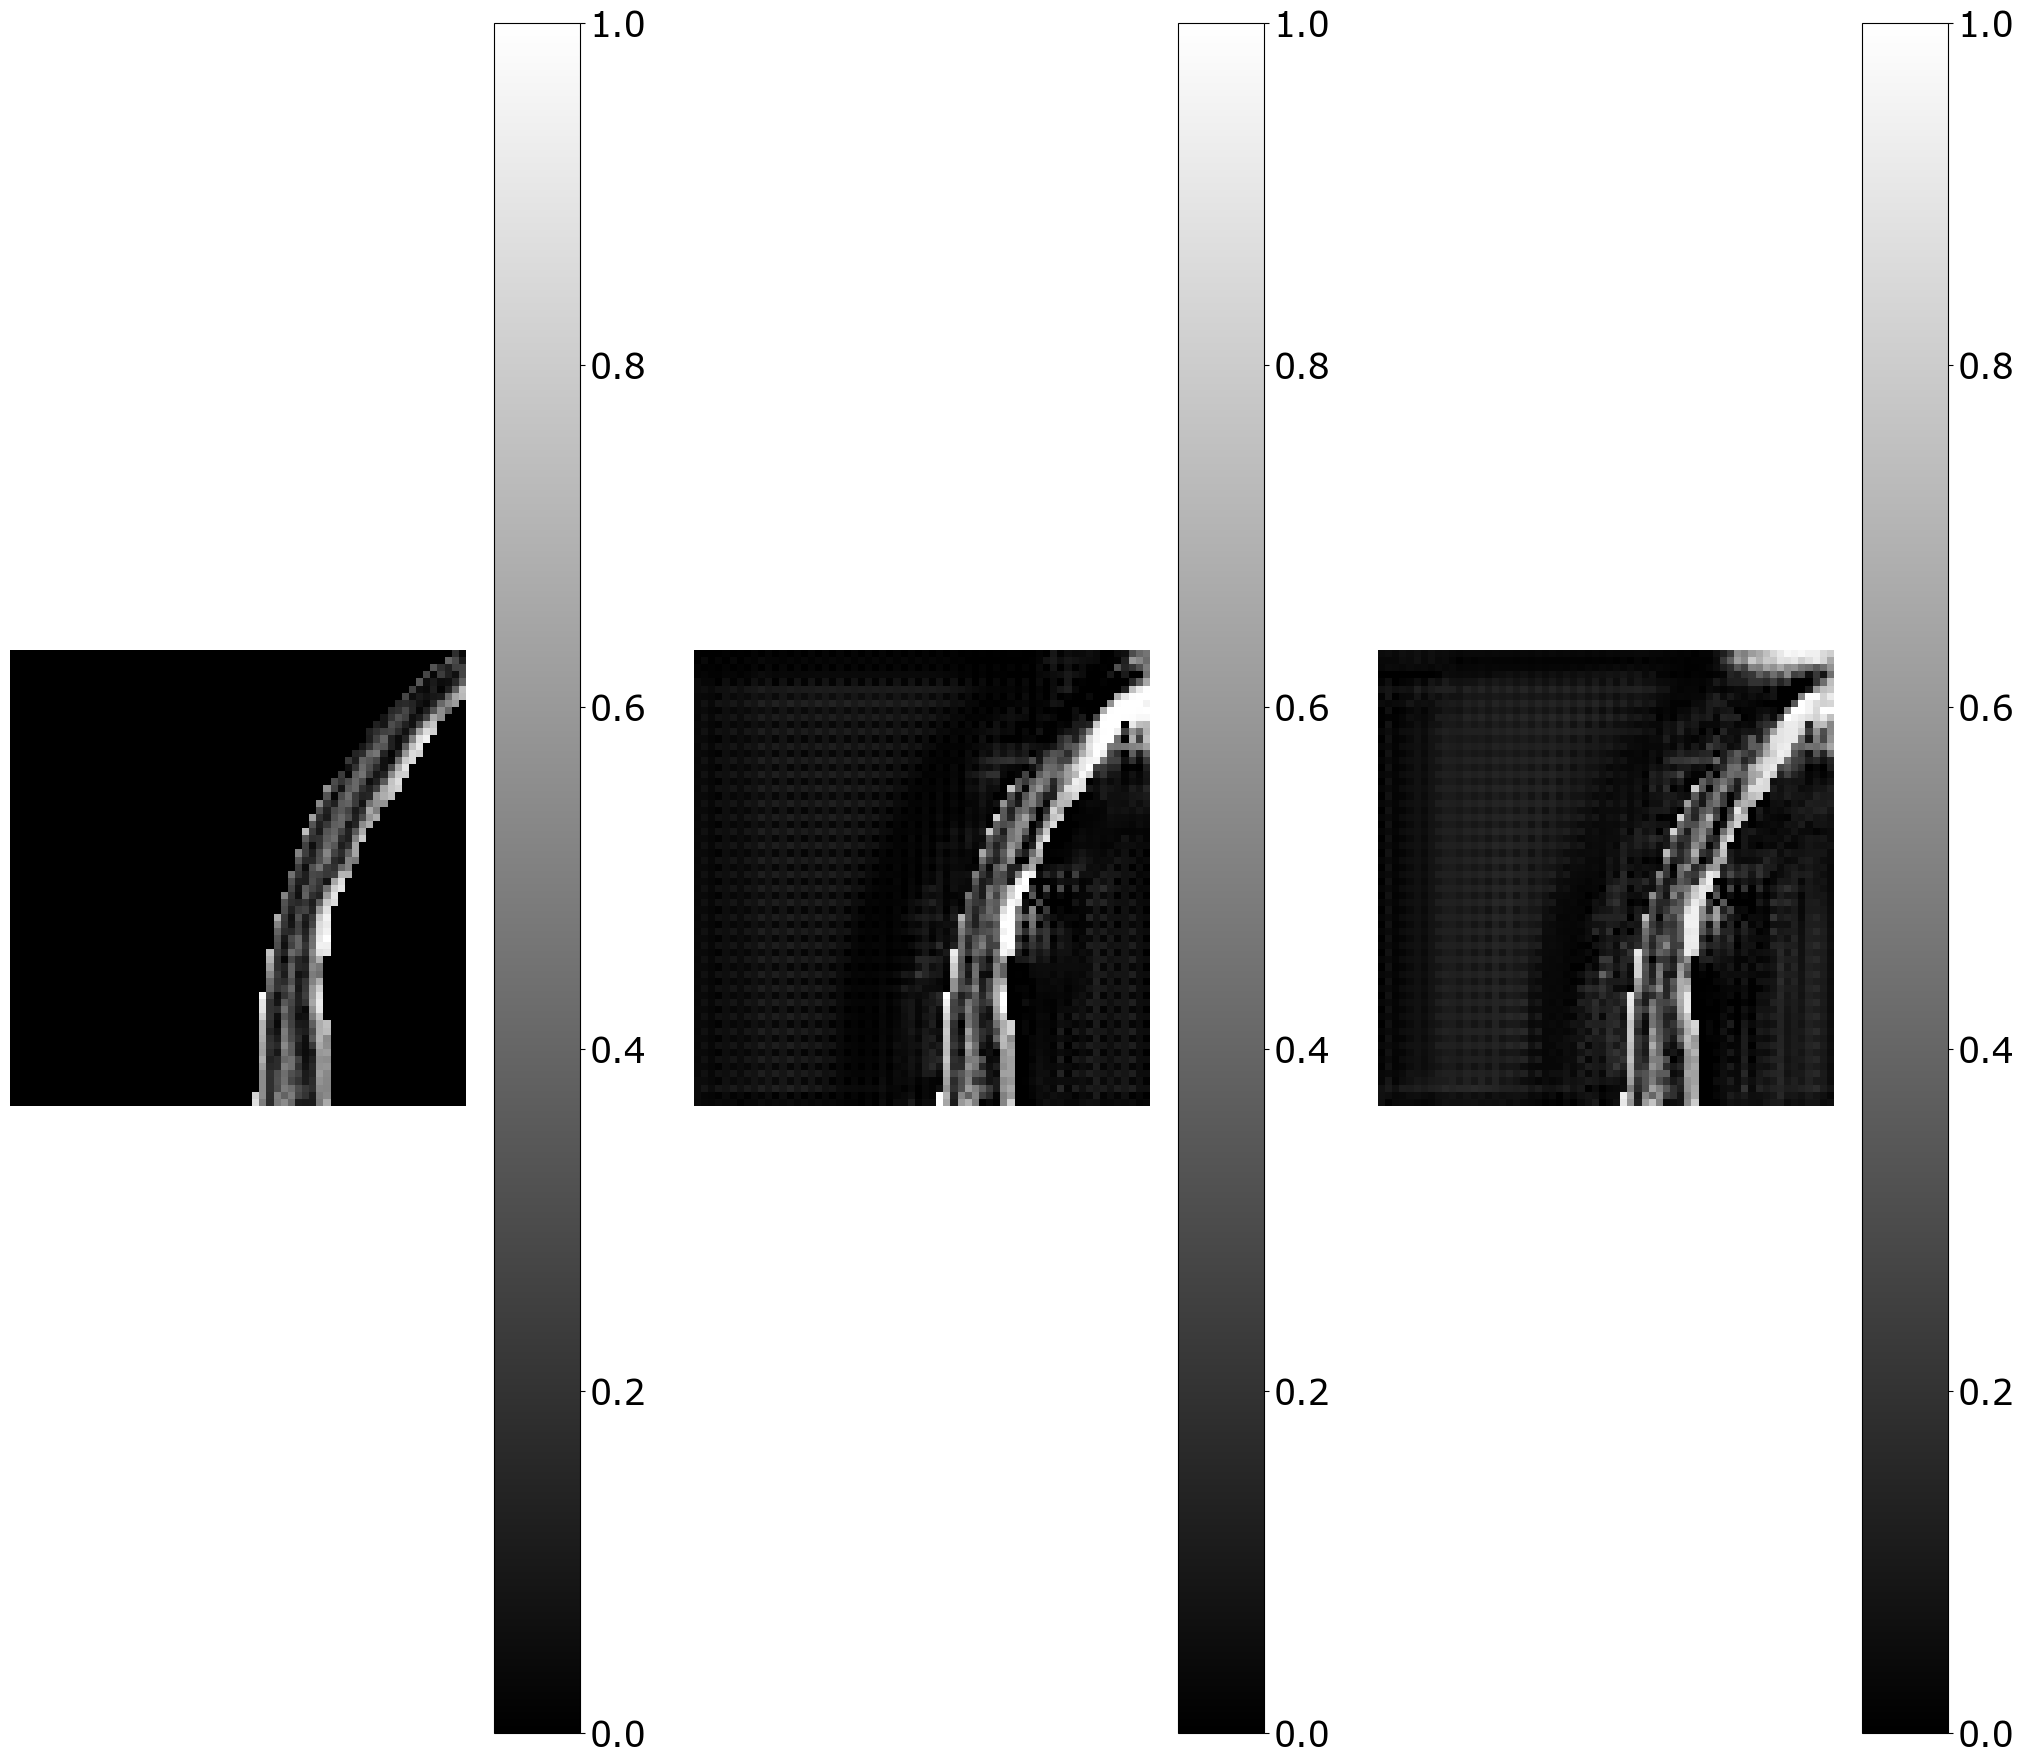

In [68]:
mri=plt.imread(r'C:/Users/Xiaowei/Desktop/Clara/CycleGAN/Datasets/CT_dataset -y3_ Copy/A/mri_img72.png')
mri = resize(mri, (64, 64))
mri = (mri - np.min(mri)) / (np.max(mri) - np.min(mri))
plt.subplots(5,5, figsize=(25,25))
G_A2B, G_B2A, D_A, D_B = load_models("45skull_bs4_dl4_lr210-4_b09")
G_A2B.to(device)
G_B2A.to(device)
D_A.to(device)
D_B.to(device)
real_mri = torch.Tensor(mri).unsqueeze(0).unsqueeze(0) ## test_mris[choose image]
fake_ct = G_A2B(real_mri.to(device)).cpu().detach().numpy()
rec_mri = G_B2A(torch.Tensor(fake_ct).to(device)).cpu().detach().numpy()
plt.subplot(1,3,1)
plt.imshow(real_mri[0,0,:,:],cmap='gray');plt.axis('off')
plt.colorbar().ax.tick_params(labelsize=25)
plt.clim(0, 1);
plt.subplot(1,3,2)
plt.imshow(fake_ct[0,0,:,:],cmap='gray');plt.axis('off')
plt.colorbar().ax.tick_params(labelsize=25)
plt.clim(0, 1);
plt.subplot(1,3,3)
plt.imshow(rec_mri[0,0,:,:],cmap='gray');plt.axis('off')
plt.colorbar().ax.tick_params(labelsize=25)
plt.clim(0, 1);